# Ames Housing Data

The main purpose of this data science project is to predict the home prices in Ames, Iowa by using regression models. By doing this data analysis, we can find the theoretical relationship have in mind. Probably, there is specific interest in the magnitudes and signs of the coefficients. Throughout the iterative modeling and feature selection processes manually and automatedly, we can gain a deeper insight into 80 variables which were directly related to property sales and understand better the mechanism behind various models.

In order to understand the dataset easier, please review the data description by the following link http://jse.amstat.org/v19n3/decock/DataDocumentation.txt


## Data Cleaning and EDA

In [1]:
import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler, LabelBinarizer

import warnings

import pickle

import csv

import time

import re

from sklearn_pandas import DataFrameMapper

from sklearn_pandas import gen_features

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading the data

train = pd.read_csv('datasets/train.csv', na_values = "", keep_default_na = False)

test = pd.read_csv('datasets/test.csv', na_values = "", keep_default_na = False)

In [3]:
train.shape

(2051, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### Missing Values

Text(0, 0.5, 'Feature Names')

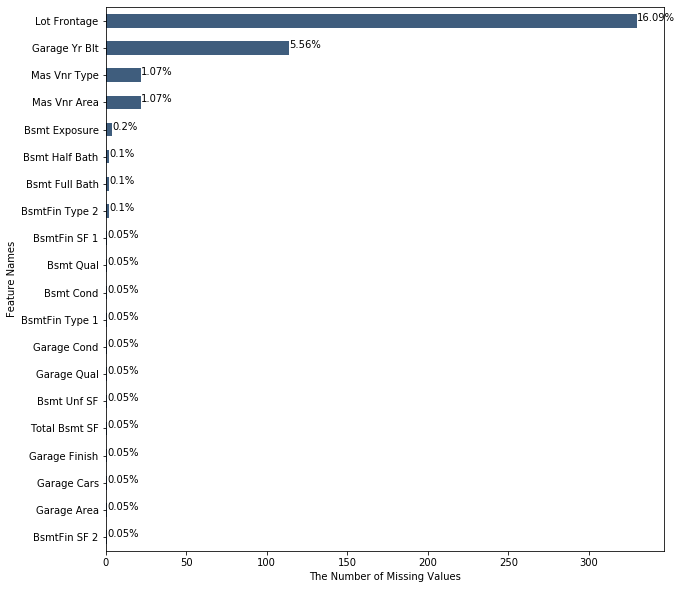

In [6]:
# Nan is the list of features, have null values

Nan = train.isnull().sum()[train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/2051*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')

#### Relationship between Lot Frontage and Lot Area

Text(0.5, 1.0, 'Lot_Area vs Lot Frontage')

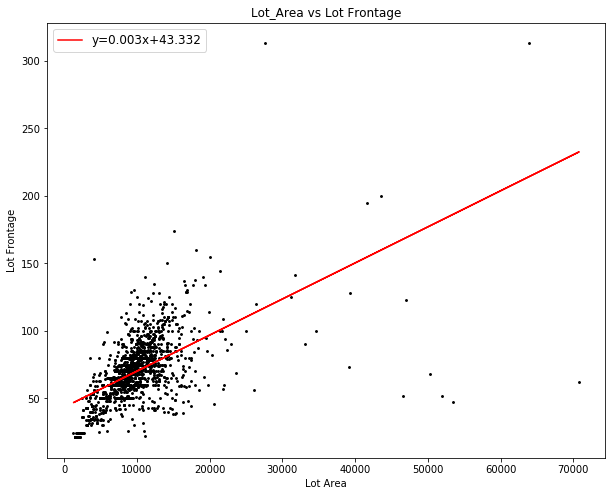

In [7]:
mask = train['Lot Frontage'].isnull() == False

Lot_x = train[mask]['Lot Area']

Lot_y = train[mask]['Lot Frontage']

slope, intercept, r_value, p_value, std_err = stats.linregress(Lot_x,Lot_y) # reference: stats model libraray

line = slope*Lot_x+intercept

plt.figure(figsize=(10,8))

plt.plot(Lot_x, line, 'r', label='y={:.3f}x+{:.3f}'.format(slope,intercept));

plt.scatter(Lot_x,Lot_y, color="k", s=3.5)

plt.legend(fontsize = 12)

plt.xlabel('Lot Area')

plt.ylabel('Lot Frontage')

plt.title('Lot_Area vs Lot Frontage')

Based on the graph above, we can see that Lot Frontage and Lot Area relatively have a linear relationship

In [8]:
train['Lot Frontage'] = train.apply(lambda row: round(row['Lot Area']*0.003 +43.332,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

#### Fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house.

In [9]:
train['Garage Yr Blt'] = train.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

#### Based on the data description, there are several columns that containing NA which are not the actual missing values but the 'None' of these features. Numerical features containing an NA will be set to 0, categorical features containing an NA will be set to string value 'None'.

In [10]:
# Checking columns contain missing values

train.isnull().sum()[train.isnull().sum()>0]

Mas Vnr Type      22
Mas Vnr Area      22
Bsmt Qual          1
Bsmt Cond          1
Bsmt Exposure      4
BsmtFin Type 1     1
BsmtFin SF 1       1
BsmtFin Type 2     2
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Finish      1
Garage Cars        1
Garage Area        1
Garage Qual        1
Garage Cond        1
dtype: int64

In [11]:
train.fillna(train[['Garage Finish','Garage Qual','Garage Cond',
                    'Bsmt Cond', 'Bsmt Qual', 'Bsmt Exposure', 
                    'BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']].fillna('None'),inplace=True)

train.fillna(train[['Bsmt Half Bath','Bsmt Full Bath','BsmtFin SF 1','BsmtFin SF 2',
                    'Bsmt Unf SF','Total Bsmt SF','Mas Vnr Area','Garage Cars',
                    'Garage Area']].fillna(0),inplace=True)

In [12]:
# Double check missing values

train.isnull().sum().sum()

0

## Exploratory Data Analysis and Cleaning

#### Let's look at the distribution of the target variable SalePrice and Ground Living Area vs SalePrice

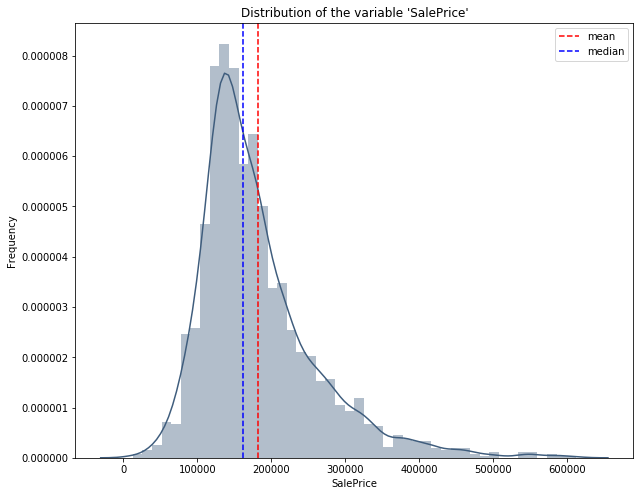

In [13]:
plt.figure(figsize=(10,8))

sns.distplot(train['SalePrice'], color="#3F5D7D")

plt.ylabel('Frequency')

plt.title("Distribution of the variable 'SalePrice'")

plt.axvline(train['SalePrice'].mean(), linestyle = '--', color = 'r', label ='mean')

plt.axvline(train['SalePrice'].median(), linestyle = '--', color = 'b', label ='median')

plt.legend()

The distribution of the SalePrice is right-skewed, the outliers can be observed in the data. Drop the rows that SalePrice lower than \$20000 and higher than \\$600000.

In [14]:
train[(train['SalePrice'] < 20000)|(train['SalePrice'] > 600000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NA,Reg,Low,...,0,0,NA,NA,NA,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,6,2010,WD,12789
1671,45,528150070,20,RL,100.0,12919,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,New,611657


In [15]:
train.drop([1554,182,45],0,inplace=True)

In [16]:
# selling price in log

train['SalePrice'] = np.log(train['SalePrice'])

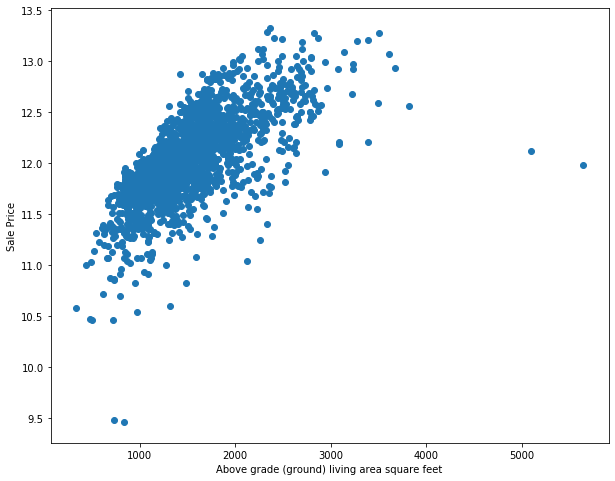

In [17]:
plt.figure(figsize=(10,8))

plt.scatter(x = train['Gr Liv Area'], y = train['SalePrice'])

plt.xlabel('Above grade (ground) living area square feet')

plt.ylabel('Sale Price')

plt.show()

In [18]:
# So, we need to drop some observations which have more than 4000 sq_ft living area.

train.drop(train[train['Gr Liv Area'] > 4000].index, inplace = True)

train.drop(train[train['SalePrice'] < 10].index, inplace = True)

**Now, we will do the same thing with test dataset.**

In [19]:
test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New


In [20]:
test.shape

(879, 80)

In [21]:
# Checking missing values for each column

test.isnull().sum()[test.isnull().sum()>0]

Lot Frontage     160
Mas Vnr Type       1
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

Text(0.5, 1.0, 'Lot_Area vs Lot Frontage')

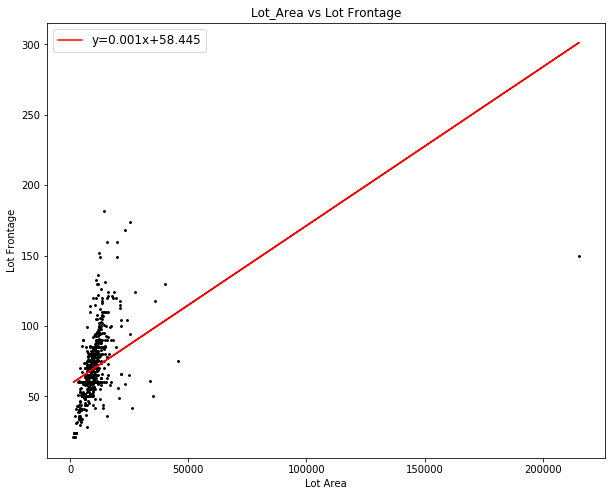

In [22]:
mask_test = test['Lot Frontage'].isnull() == False

Lot_x_test = test[mask_test]['Lot Area']

Lot_y_test = test[mask_test]['Lot Frontage']

slope, intercept, r_value, p_value, std_err = stats.linregress(Lot_x_test,Lot_y_test) # reference: stats model libraray

line = slope*Lot_x_test+intercept

plt.figure(figsize=(10,8))

plt.plot(Lot_x_test, line, 'r', label='y={:.3f}x+{:.3f}'.format(slope,intercept));

plt.scatter(Lot_x_test,Lot_y_test, color="k", s=3.5)

plt.legend(fontsize = 12)

plt.xlabel('Lot Area')

plt.ylabel('Lot Frontage')

plt.title('Lot_Area vs Lot Frontage')

In [23]:
test['Lot Frontage'] = test.apply(lambda row: round(row['Lot Area']*0.001 +58.445,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

In [24]:
# Checking missing values for each column again

test.isnull().sum()[test.isnull().sum()>0]

Mas Vnr Type      1
Mas Vnr Area      1
Electrical        1
Garage Yr Blt    45
Garage Finish     1
dtype: int64

#### Fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house

In [25]:
test['Garage Yr Blt'] = test.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [26]:
test.fillna(train[['Mas Vnr Type', 'Electrical', 'Garage Finish']].fillna('None'),inplace=True)

test.fillna(train[['Mas Vnr Area']].fillna(0),inplace=True)

In [27]:
# Checking missing values again

test.isnull().sum().sum()

0

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2044 non-null int64
PID                2044 non-null int64
MS SubClass        2044 non-null int64
MS Zoning          2044 non-null object
Lot Frontage       2044 non-null float64
Lot Area           2044 non-null int64
Street             2044 non-null object
Alley              2044 non-null object
Lot Shape          2044 non-null object
Land Contour       2044 non-null object
Utilities          2044 non-null object
Lot Config         2044 non-null object
Land Slope         2044 non-null object
Neighborhood       2044 non-null object
Condition 1        2044 non-null object
Condition 2        2044 non-null object
Bldg Type          2044 non-null object
House Style        2044 non-null object
Overall Qual       2044 non-null int64
Overall Cond       2044 non-null int64
Year Built         2044 non-null int64
Year Remod/Add     2044 non-null int64
Roof Style         2

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       879 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof 

# Exploratory Visualizations and Pre-processing


### Exploratory Visualizations
   - Look at correlations.
   - Look at relationships to target (scatter plots for continuous, box plots for categorical).

### Pre-processing
   - One-hot encode categorical variables.
   - Train/test split your data.
   - Scale your data.
   - Consider using automated feature selection.

### Categorical features vs SalePrice

In [30]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = train.groupby(column).mean()['SalePrice'].sort_values().index
        
        sns.boxplot(dataframe[column],dataframe['SalePrice'],order = names, ax = ax[i], color="#3F5D7D") 
        
        ax[i].set_title(f' " SalePrice" vs "{column}"', fontsize =18)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

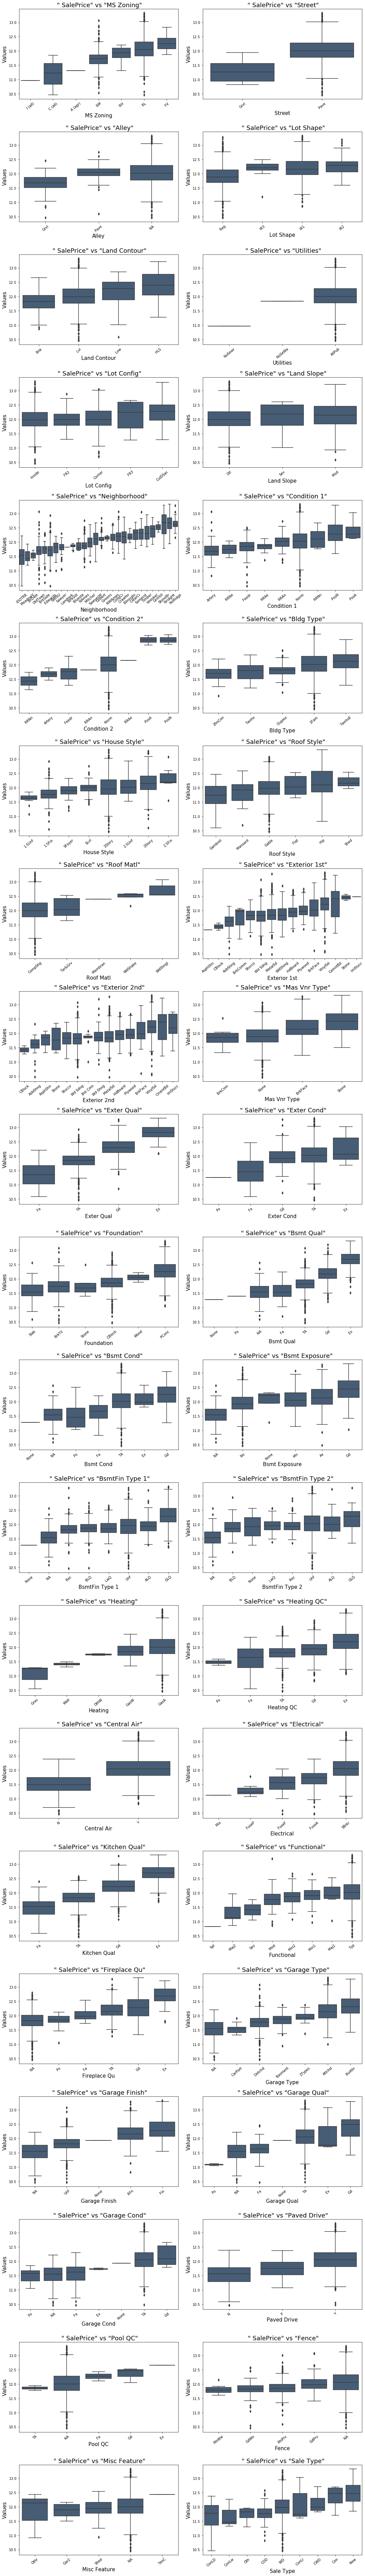

In [31]:
Catogories_columns = train.select_dtypes(include = 'object').columns

subplot_boxplot(train, Catogories_columns)

By observation on the boxplots of categorical features, the Lot Config, and Land Slope don't have linear relationships with SalePrice. Moreover, the features of Lot Config, Land Slope and Utilities can be dropped from the training dataset.

In [32]:
train.drop(['Lot Config','Land Slope','Utilities'], axis =1, inplace=True)

## Numerical features vs SalePrice

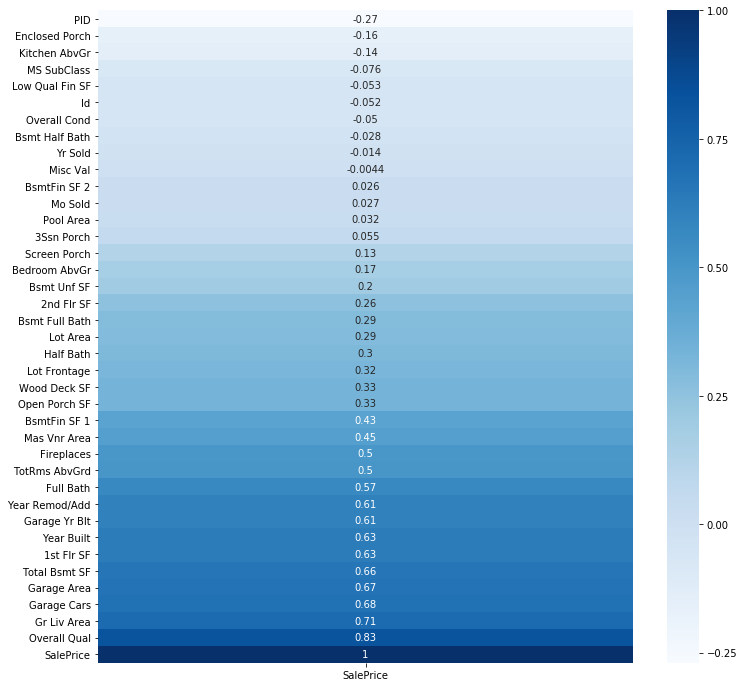

In [33]:
plt.figure(figsize = (12,12))

sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True,cmap ='Blues');

In [34]:
# Drop the irrelated data columns 

train.drop(['PID','Misc Val'],axis =1, inplace=True)

#### Relationship between Total Bsmt SF and BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF

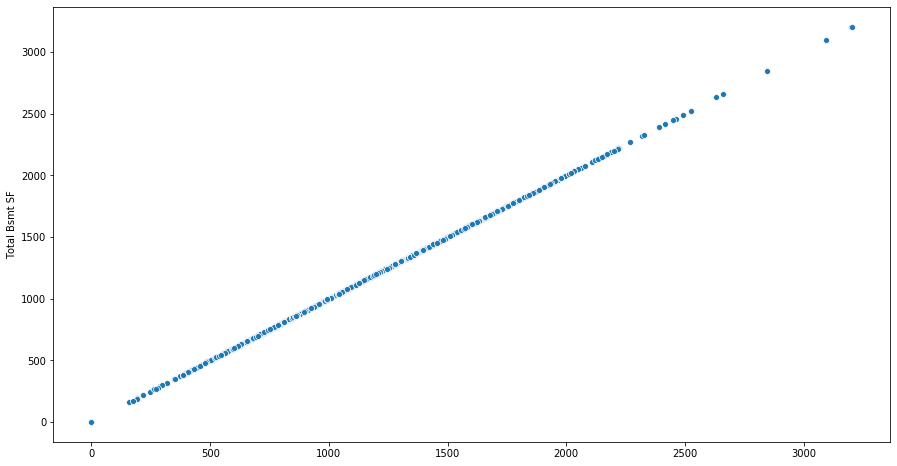

In [35]:
plt.figure(figsize=(15,8))

sns.scatterplot(train['BsmtFin SF 1']+train['BsmtFin SF 2']+train['Bsmt Unf SF'],train['Total Bsmt SF'])

Basd on observating, we can see that Total Bsmt SF = BsmtFin SF 1+ BsmtFin SF 2+ Bsmt Unf SF, so I keep only Total Bsmt SF feature

In [36]:
train.drop(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], 1, inplace=True)

#### Relationship between Gr Liv Area and 1st Flr SF, 2nd  Flr SF, Low Qual Fin SF

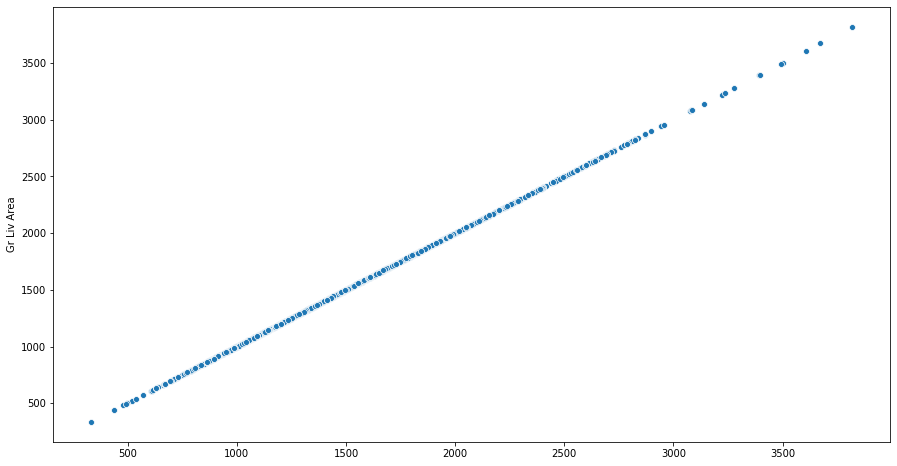

In [37]:
plt.figure(figsize=(15,8))

sns.scatterplot(train['1st Flr SF']+train['2nd Flr SF']+train['Low Qual Fin SF'],train['Gr Liv Area'])

In [38]:
# Again, I only keep "Gr Liv Area" feature

train.drop(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], 1, inplace=True)

The scatter plot can be useful for looking at the linear relationship between the target variable and the variables which have the correlation coefficient higher than 0.25

In [39]:
def subplot_scatter(dataframe, x):
    
    nrows = int(np.ceil(len(x)/2)) # Makes sure we have enough row
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) # to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    if len(x) %2 !=0:
        
        ax[len(x)].set_visible(False)
        
    for i in range(len(x)): # Gives us an index value to get into all our lists
        
        sns.scatterplot(dataframe[x[i]],dataframe['SalePrice'] ,ax = ax[i],color="#3F5D7D") 
        
        ax[i].set_title(x[i] +' vs SalePrice', fontsize =18)
        
        ax[i].set_ylabel('SalePrice',fontsize=15)
        
        ax[i].set_xlabel(x[i],fontsize=15)
        
        ax[i].spines["top"].set_visible(False)  
        
        ax[i].spines["right"].set_visible(False) 
        
    plt.tight_layout()

In [40]:
high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']

corr_features = train.corr()[['SalePrice']][high_corr][:-1].index

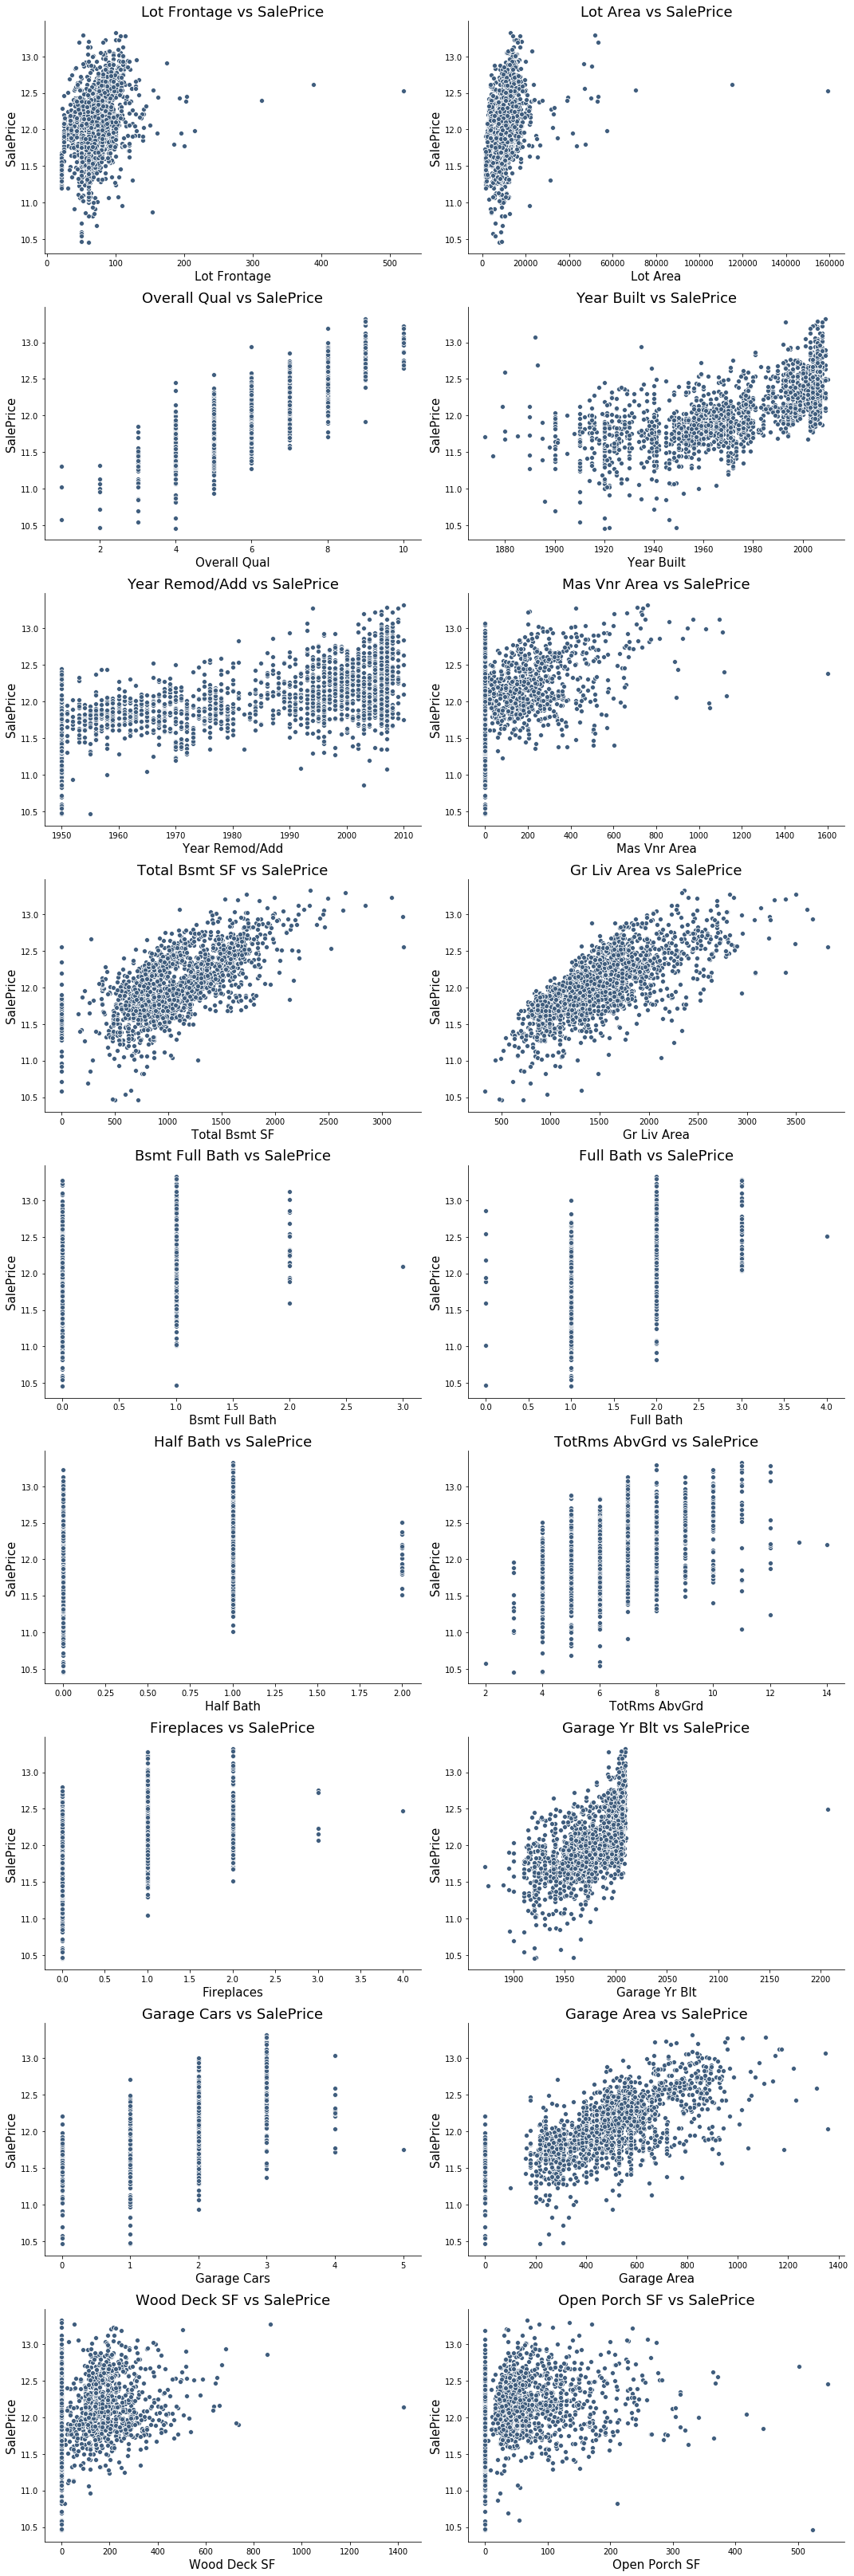

In [41]:
subplot_scatter(train,corr_features)

#### Filter the training dataset in order to include only categorical variables and numerical variables which have high linear relationship with target variable SalePrice.

In [42]:
Category = train.select_dtypes(include = 'object').columns

high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']

corr_gt_25 = train.corr()[['SalePrice']][high_corr].index

In [43]:
train_clean = pd.concat([train[Category],train[corr_gt_25]],axis=1)

In [44]:
train_clean.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,...,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,RL,Pave,NA,IR1,Lvl,Sawyer,RRAe,Norm,1Fam,2Story,...,2,1,6,0,1976.0,2.0,475.0,0,44,11.779129
1,RL,Pave,NA,IR1,Lvl,SawyerW,Norm,Norm,1Fam,2Story,...,2,1,8,1,1997.0,2.0,559.0,0,74,12.301383
2,RL,Pave,NA,Reg,Lvl,NAmes,Norm,Norm,1Fam,1Story,...,1,0,5,0,1953.0,1.0,246.0,0,52,11.599103
3,RL,Pave,NA,Reg,Lvl,Timber,Norm,Norm,1Fam,2Story,...,2,1,7,0,2007.0,2.0,400.0,100,0,12.066811
4,RL,Pave,NA,IR1,Lvl,SawyerW,Norm,Norm,1Fam,1.5Fin,...,2,0,6,0,1957.0,2.0,484.0,0,59,11.838626


In [45]:
train_clean.shape

(2044, 58)

In [46]:
# Separating "Numeric" and "Catogories" types

train_clean_numeric = train.select_dtypes(include = [np.number])

train_clean_object = train_clean.select_dtypes(include = 'object')

In [47]:
# One-hot-encode

feature_def = gen_features(columns = train_clean_object.columns.tolist(), classes=[LabelBinarizer])

mapper5 = DataFrameMapper(feature_def,df_out=True)

object_df = mapper5.fit_transform(train_clean_object)

In [48]:
# New dataframe for pre-processing

house = pd.concat([train_clean_numeric, object_df], axis=1)

In [49]:
house.shape

(2044, 291)

## Declare the X and the y

In [50]:
y = house['SalePrice']

X = house.drop(['SalePrice'],axis=1).values

## Scale the data

In [51]:
# Create a scaler object

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

## Train Test Split

In [52]:
# Split the variables with an 80-20 split and some random state. In order to have the same split as mine, use random_state = 365

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 365)

### Declare the X and the y

In [53]:
y = house['SalePrice']

X = house.drop(['SalePrice'],axis=1).values

### Scale the data

In [54]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state. In order to have the same split as mine, use random_state = 365

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 365)

### Automated feature selection

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

select = SelectFromModel(RandomForestRegressor(n_estimators = 250, random_state = 365))

select.fit(X_train, y_train)

X_train_rf = select.transform(X_train)

X_test_rf = select.transform(X_test)

## Modeling

### Linear regression model

In [57]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

ln = LinearRegression()

ln.fit(X_train_rf, y_train)

ln.score(X_train_rf,y_train)

0.8987676790942163

In [58]:
#predicting on the test set

predictions_ln = ln.predict(X_test_rf)

from sklearn import metrics

R2_score_ln = metrics.r2_score(y_test, predictions_ln)
R2_score_ln

0.8772504646265732

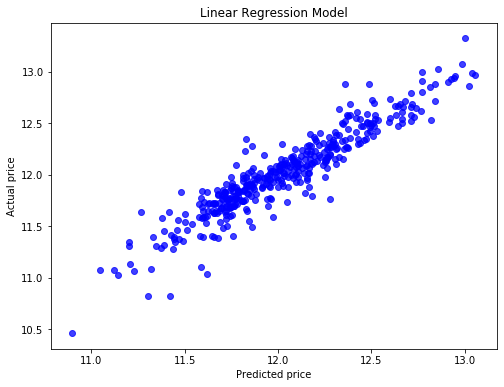

In [59]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ln, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

## Lasso Regression

In [60]:
from sklearn.linear_model import Lasso, LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X_train_rf, y_train)

print(optimal_lasso.alpha_)

0.0006101893557919366


In [61]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_rf, y_train, cv=10)

lasso.fit(X_train_rf, y_train)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.9235301  0.90912988 0.8985993  0.90510721 0.89745585 0.87226837
 0.90383669 0.89584981 0.87053464 0.87816261]
0.8954474460843448


In [62]:
#predicting on the test set

predictions_lasso = lasso.predict(X_test_rf)

R2_score_lasso = metrics.r2_score(y_test, predictions_lasso)
R2_score_lasso

0.8774418691490904

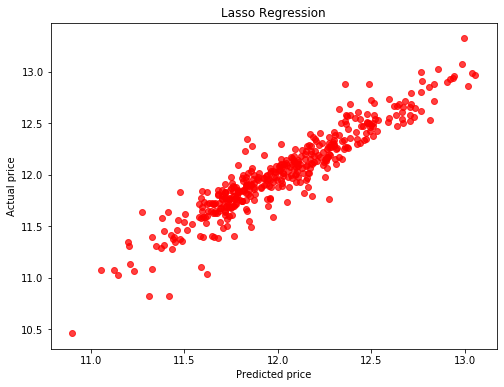

In [63]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_lasso, actual_values, alpha= 0.75, color = 'r')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Lasso Regression')
plt.show()

## Ridge Regression

In [64]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_rf, y_train)

print(optimal_ridge.alpha_)

9.54771611420806


In [65]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_rf, y_train, cv=10)

ridge.fit(X_train_rf, y_train)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.92314569 0.90920225 0.89852527 0.90517813 0.89756763 0.87229851
 0.90378049 0.89576173 0.87025933 0.87813148]
0.8953850536263687


In [66]:
#predicting on the test set

predictions_ridge = ridge.predict(X_test_rf)

R2_score_ridge = metrics.r2_score(y_test, predictions_ridge)
R2_score_ridge

0.877300636608147

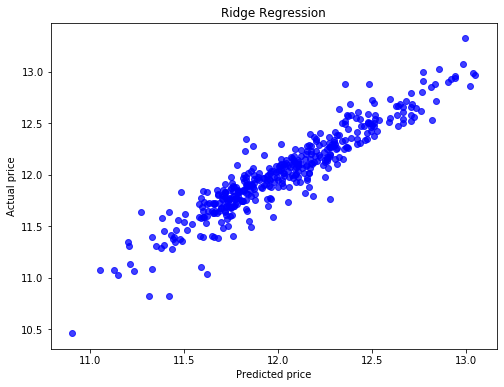

In [67]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ridge, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Ridge Regression')
plt.show()

## ElasticNet Regression

In [68]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
optimal_enet.fit(X_train_rf, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

0.0022520735939756003
0.2575


In [69]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train_rf, y_train, cv=10)

enet.fit(X_train_rf, y_train)

print(enet_scores)
print(np.mean(enet_scores))

[0.92348188 0.90910268 0.89863384 0.90514323 0.89755184 0.87231319
 0.90381367 0.89572881 0.8705279  0.87818322]
0.8954480254226796


In [70]:
#predicting on the test set

predictions_enet = enet.predict(X_test_rf)

R2_score_enet = metrics.r2_score(y_test, predictions_enet)
R2_score_enet

0.8774084022352739

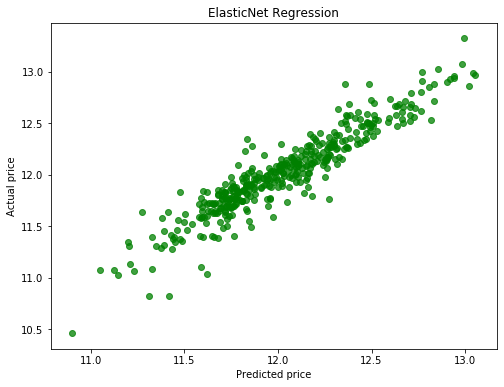

In [71]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_enet, actual_values, alpha= 0.75, color = 'g')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('ElasticNet Regression')
plt.show()

## Choosing the right model

In [72]:
R2 = pd.DataFrame({'Linear Regression': [R2_score_ln], 'Ridge Regression': [R2_score_ridge], 'Lasso Regression': [R2_score_lasso], 
                  'ElasticNet Regression': [R2_score_enet]})

In [73]:
R2.T.sort_values(0, ascending = False)

,0
Lasso Regression,0.877442
ElasticNet Regression,0.877408
Ridge Regression,0.877301
Linear Regression,0.877250


# Predicting for train dataset

In [74]:
predictions_lasso

array([12.07804458, 11.45175266, 11.97512563, 12.15085916, 12.90464553,
       11.94682165, 12.38345435, 11.81549037, 11.93965577, 12.24213231,
       11.57772833, 12.72600396, 11.50256993, 11.89540699, 11.5891121 ,
       12.30515544, 11.75352713, 12.34502336, 12.27832234, 11.7487855 ,
       11.74068595, 12.14883138, 12.19983549, 12.12527108, 11.87294194,
       12.10510623, 12.08535382, 11.67988867, 11.89930616, 11.20461006,
       12.67742112, 11.65521919, 12.2230378 , 11.70349724, 13.05624902,
       11.72334273, 11.86272044, 12.0865737 , 11.81541185, 12.76448825,
       11.9108699 , 11.73906029, 12.29797391, 12.83578228, 11.59694613,
       12.30283801, 11.95756381, 11.30905167, 12.01416771, 11.71514179,
       11.81335903, 12.08439018, 12.92172176, 11.7432109 , 12.18437079,
       12.02317303, 11.83062465, 12.15645464, 12.51478014, 11.72417296,
       11.34714758, 11.78433667, 11.7259066 , 12.29973306, 12.21746666,
       12.26411395, 12.76908995, 12.12023526, 11.67313336, 11.80